<a href="https://colab.research.google.com/github/nimajr/MachineLearning2023/blob/main/hw2/q2/hw2q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [4]:
  df = pd.read_csv('/content/teleCust1000t.csv')
  print(df.head())

   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3  


In [5]:
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


(   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
 0       2      13   44        1        9    64.0   4       5     0.0       0   
 1       3      11   33        1        7   136.0   5       5     0.0       0   
 2       3      68   52        1       24   116.0   1      29     0.0       1   
 3       2      33   33        0       12    33.0   2       0     0.0       1   
 4       2      23   30        1        9    30.0   1       2     0.0       0   
 
    reside  custcat  
 0       2        1  
 1       6        4  
 2       2        3  
 3       1        1  
 4       4        3  ,
 None)

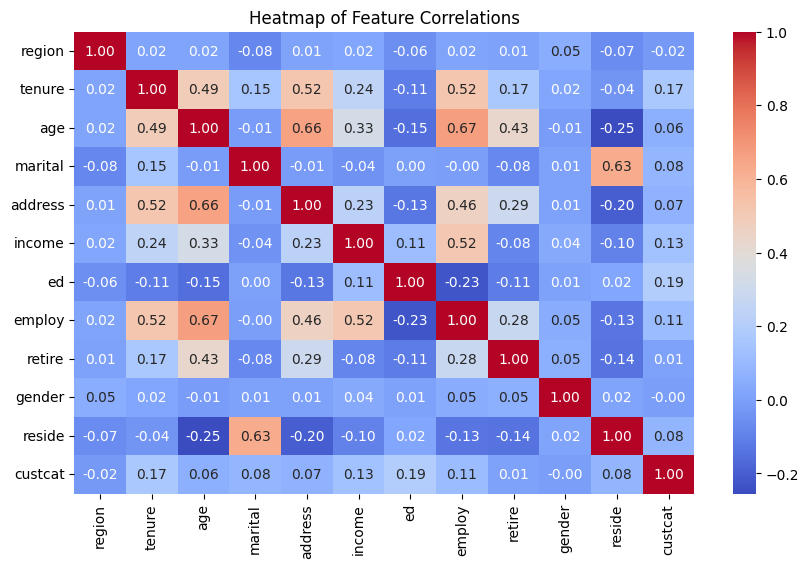

Index(['ed', 'tenure'], dtype='object')

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap for correlation
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Feature Correlations")
plt.show()

# Find the two features with the highest correlation with the target 'custcat'
correlations_with_target = correlation_matrix["custcat"].sort_values(ascending=False)
top_features = correlations_with_target.index[1:3]  # Exclude 'custcat' itself
top_features


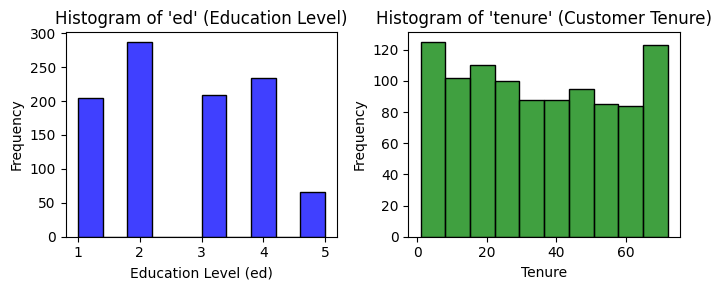

In [7]:
# Plot histograms for the two features with the highest correlation with 'custcat'
plt.figure(figsize=(7, 3))

# Histogram for 'ed'
plt.subplot(1, 2, 1)
sns.histplot(df['ed'], kde=False, bins=10, color="blue", edgecolor="black")
plt.title("Histogram of 'ed' (Education Level)")
plt.xlabel("Education Level (ed)")
plt.ylabel("Frequency")

# Histogram for 'tenure'
plt.subplot(1, 2, 2)
sns.histplot(df['tenure'], kde=False, bins=10, color="green", edgecolor="black")
plt.title("Histogram of 'tenure' (Customer Tenure)")
plt.xlabel("Tenure")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#2. جدا کردن ویژگی‌ها (X) و هدف (y)
X = df.drop(columns=['custcat'])
y = df['custcat']

# 3. نرمالایز کردن داده‌ها با MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 4. تقسیم داده‌ها به train، test و validation
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)  # 60% train
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 20% test, 20% validation

# 5. بررسی سایز هر مجموعه
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"Validation set size: {X_val.shape}")

Training set size: (600, 11)
Testing set size: (200, 11)
Validation set size: (200, 11)


In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , LabelBinarizer
import pandas as pd
import numpy as np

# 1. خواندن داده‌ها
data = pd.read_csv("/content/teleCust1000t.csv")
X = data.drop(columns=['custcat'])
y = data['custcat']

# 3. نرمالایز کردن داده‌ها
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# بررسی و تبدیل مقادیر هدف به بازه [0, 1]
y = (y - y.min()) / (y.max() - y.min())  # نرمالایز کردن داده‌های هدف به بازه [0, 1]

# 4. تقسیم داده‌ها به train، test و validation
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)  # 60% train
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 20% test, 20% validation

# 5. تبدیل داده‌ها به PyTorch Tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)

# 6. تعریف مدل اول (یک لایه مخفی)
class MLP_OneHiddenLayer(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP_OneHiddenLayer, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# 7. تعریف مدل دوم (دو لایه مخفی)
class MLP_TwoHiddenLayer(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2):
        super(MLP_TwoHiddenLayer, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

# 8. تنظیمات مدل‌ها
input_size = X_train.shape[1]
hidden_size1 = 32
hidden_size2 = 16

model1 = MLP_OneHiddenLayer(input_size, hidden_size1)
model2 = MLP_TwoHiddenLayer(input_size, hidden_size1, hidden_size2)

# 9. تعریف تابع هزینه و بهینه‌ساز
criterion = nn.BCELoss()
optimizer1 = optim.SGD(model1.parameters(), lr=0.01)
optimizer2 = optim.SGD(model2.parameters(), lr=0.01)

# 10. تابع آموزش مدل
def train_model(model, optimizer, X_train, y_train, X_val, y_val, epochs=50):
    for epoch in range(epochs):
        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # اعتبارسنجی
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)

        # چاپ نتایج
        if (epoch+1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

# 11. آموزش مدل‌ها
print("Training Model 1 (One Hidden Layer)...")
train_model(model1, optimizer1, X_train, y_train, X_val, y_val)

print("\nTraining Model 2 (Two Hidden Layers)...")
train_model(model2, optimizer2, X_train, y_train, X_val, y_val)

# 12. ارزیابی روی داده‌های تست
def evaluate_model(model, X_test, y_test):
    with torch.no_grad():
        outputs = model(X_test)
        predictions = (outputs >= 0.5).float()
        accuracy = (predictions == y_test).float().mean()
        print(f"Accuracy: {accuracy:.4f}")

print("\nEvaluating Model 1...")
evaluate_model(model1, X_test, y_test)

print("\nEvaluating Model 2...")
evaluate_model(model2, X_test, y_test)

# 13. تحلیل وزن‌ها
print("\nWeights of Model 1:")
for name, param in model1.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data}")

print("\nWeights of Model 2:")
for name, param in model2.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data}")


Training Model 1 (One Hidden Layer)...
Epoch [10/50], Loss: 0.6976, Val Loss: 0.7039
Epoch [20/50], Loss: 0.6972, Val Loss: 0.7034
Epoch [30/50], Loss: 0.6968, Val Loss: 0.7029
Epoch [40/50], Loss: 0.6965, Val Loss: 0.7025
Epoch [50/50], Loss: 0.6962, Val Loss: 0.7021

Training Model 2 (Two Hidden Layers)...
Epoch [10/50], Loss: 0.6942, Val Loss: 0.6954
Epoch [20/50], Loss: 0.6942, Val Loss: 0.6953
Epoch [30/50], Loss: 0.6941, Val Loss: 0.6952
Epoch [40/50], Loss: 0.6940, Val Loss: 0.6951
Epoch [50/50], Loss: 0.6940, Val Loss: 0.6950

Evaluating Model 1...
Accuracy: 0.1700

Evaluating Model 2...
Accuracy: 0.1850

Weights of Model 1:
fc1.weight: tensor([[-0.1992, -0.1998, -0.0545, -0.0432,  0.0642,  0.1081, -0.1881, -0.0237,
          0.2303, -0.0141, -0.1031],
        [ 0.2951, -0.0534,  0.2995,  0.2877, -0.0060, -0.2677, -0.0419, -0.0707,
          0.1539,  0.0782,  0.0496],
        [-0.0114, -0.1057, -0.0513,  0.2298,  0.0674, -0.2747, -0.2800, -0.1471,
          0.0808,  0.0430, -0.

In [17]:
# تنظیمات جدید: تعداد نورون‌های مختلف
hidden_size_small = 16
hidden_size_large = 64

# مدل‌های جدید با تعداد نورون‌های متفاوت
model1_small = MLP_OneHiddenLayer(input_size, hidden_size_small)
model1_large = MLP_OneHiddenLayer(input_size, hidden_size_large)

model2_small = MLP_TwoHiddenLayer(input_size, hidden_size_small, hidden_size_small // 2)
model2_large = MLP_TwoHiddenLayer(input_size, hidden_size_large, hidden_size_large // 2)

# بهینه‌سازها
optimizer1_small = optim.SGD(model1_small.parameters(), lr=0.01)
optimizer1_large = optim.SGD(model1_large.parameters(), lr=0.01)

optimizer2_small = optim.SGD(model2_small.parameters(), lr=0.01)
optimizer2_large = optim.SGD(model2_large.parameters(), lr=0.01)

# آموزش مدل‌ها
print("\nTraining Model 1 (One Hidden Layer, Small)...")
train_model(model1_small, optimizer1_small, X_train, y_train, X_val, y_val)

print("\nTraining Model 1 (One Hidden Layer, Large)...")
train_model(model1_large, optimizer1_large, X_train, y_train, X_val, y_val)

print("\nTraining Model 2 (Two Hidden Layers, Small)...")
train_model(model2_small, optimizer2_small, X_train, y_train, X_val, y_val)

print("\nTraining Model 2 (Two Hidden Layers, Large)...")
train_model(model2_large, optimizer2_large, X_train, y_train, X_val, y_val)

# ارزیابی مدل‌ها
print("\nEvaluating Model 1 (One Hidden Layer, Small)...")
evaluate_model(model1_small, X_test, y_test)

print("\nEvaluating Model 1 (One Hidden Layer, Large)...")
evaluate_model(model1_large, X_test, y_test)

print("\nEvaluating Model 2 (Two Hidden Layers, Small)...")
evaluate_model(model2_small, X_test, y_test)

print("\nEvaluating Model 2 (Two Hidden Layers, Large)...")
evaluate_model(model2_large, X_test, y_test)



Training Model 1 (One Hidden Layer, Small)...
Epoch [10/50], Loss: 0.6992, Val Loss: 0.7040
Epoch [20/50], Loss: 0.6990, Val Loss: 0.7037
Epoch [30/50], Loss: 0.6987, Val Loss: 0.7034
Epoch [40/50], Loss: 0.6985, Val Loss: 0.7031
Epoch [50/50], Loss: 0.6983, Val Loss: 0.7028

Training Model 1 (One Hidden Layer, Large)...
Epoch [10/50], Loss: 0.6941, Val Loss: 0.6946
Epoch [20/50], Loss: 0.6933, Val Loss: 0.6940
Epoch [30/50], Loss: 0.6926, Val Loss: 0.6935
Epoch [40/50], Loss: 0.6920, Val Loss: 0.6931
Epoch [50/50], Loss: 0.6915, Val Loss: 0.6927

Training Model 2 (Two Hidden Layers, Small)...
Epoch [10/50], Loss: 0.6956, Val Loss: 0.6942
Epoch [20/50], Loss: 0.6956, Val Loss: 0.6941
Epoch [30/50], Loss: 0.6955, Val Loss: 0.6941
Epoch [40/50], Loss: 0.6954, Val Loss: 0.6941
Epoch [50/50], Loss: 0.6953, Val Loss: 0.6940

Training Model 2 (Two Hidden Layers, Large)...
Epoch [10/50], Loss: 0.6951, Val Loss: 0.6937
Epoch [20/50], Loss: 0.6948, Val Loss: 0.6935
Epoch [30/50], Loss: 0.6945,

In [19]:

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)  # 60% train
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 20% test, 20% validation

# 5. تبدیل داده‌ها به PyTorch Tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)

# 6. تعریف مدل اول (یک لایه مخفی با Dropout)
class MLP_OneHiddenLayer_Dropout(nn.Module):
    def __init__(self, input_size, hidden_size, dropout_rate=0.5):
        super(MLP_OneHiddenLayer_Dropout, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)  # اضافه کردن نرمال‌سازی دسته‌ای
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_size, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc2(x))
        return x

# 7. تعریف مدل دوم (دو لایه مخفی با Dropout)
class MLP_TwoHiddenLayer_Dropout(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, dropout_rate=0.5):
        super(MLP_TwoHiddenLayer_Dropout, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.bn1 = nn.BatchNorm1d(hidden_size1)  # اضافه کردن نرمال‌سازی دسته‌ای
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.bn2 = nn.BatchNorm1d(hidden_size2)  # اضافه کردن نرمال‌سازی دسته‌ای
        self.dropout = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(hidden_size2, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc3(x))
        return x

# 8. تنظیمات مدل‌ها
input_size = X_train.shape[1]
hidden_size1 = 32
hidden_size2 = 16
dropout_rate = 0.5

model1 = MLP_OneHiddenLayer_Dropout(input_size, hidden_size1, dropout_rate)
model2 = MLP_TwoHiddenLayer_Dropout(input_size, hidden_size1, hidden_size2, dropout_rate)

# 9. تعریف تابع هزینه و بهینه‌ساز
criterion = nn.BCELoss()
optimizer1 = optim.SGD(model1.parameters(), lr=0.01)
optimizer2 = optim.SGD(model2.parameters(), lr=0.01)

# 10. تابع آموزش مدل
def train_model(model, optimizer, X_train, y_train, X_val, y_val, epochs=50):
    for epoch in range(epochs):
        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # اعتبارسنجی
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)

        # چاپ نتایج
        if (epoch+1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

# 11. آموزش مدل‌ها
print("Training Model 1 (One Hidden Layer with Dropout)...")
train_model(model1, optimizer1, X_train, y_train, X_val, y_val)

print("\nTraining Model 2 (Two Hidden Layers with Dropout)...")
train_model(model2, optimizer2, X_train, y_train, X_val, y_val)

# 12. ارزیابی روی داده‌های تست
def evaluate_model(model, X_test, y_test):
    with torch.no_grad():
        outputs = model(X_test)
        predictions = (outputs >= 0.5).float()
        accuracy = (predictions == y_test).float().mean()
        print(f"Accuracy: {accuracy:.4f}")

print("\nEvaluating Model 1...")
evaluate_model(model1, X_test, y_test)

print("\nEvaluating Model 2...")
evaluate_model(model2, X_test, y_test)

# 13. تحلیل وزن‌ها
print("\nWeights of Model 1:")
for name, param in model1.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data}")

print("\nWeights of Model 2:")
for name, param in model2.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data}")


Training Model 1 (One Hidden Layer with Dropout)...
Epoch [10/50], Loss: 0.7060, Val Loss: 0.7105
Epoch [20/50], Loss: 0.7021, Val Loss: 0.7152
Epoch [30/50], Loss: 0.7191, Val Loss: 0.7107
Epoch [40/50], Loss: 0.6966, Val Loss: 0.7026
Epoch [50/50], Loss: 0.7060, Val Loss: 0.7027

Training Model 2 (Two Hidden Layers with Dropout)...
Epoch [10/50], Loss: 0.7276, Val Loss: 0.7127
Epoch [20/50], Loss: 0.7221, Val Loss: 0.7355
Epoch [30/50], Loss: 0.7260, Val Loss: 0.6859
Epoch [40/50], Loss: 0.7324, Val Loss: 0.7257
Epoch [50/50], Loss: 0.7173, Val Loss: 0.7246

Evaluating Model 1...
Accuracy: 0.2750

Evaluating Model 2...
Accuracy: 0.2700

Weights of Model 1:
fc1.weight: tensor([[ 1.2656e-01, -2.5836e-01,  3.3156e-02, -1.5560e-01, -3.5241e-02,
          1.8799e-01, -2.9421e-01,  9.8336e-03, -1.7796e-01,  1.3598e-01,
         -1.2692e-01],
        [-1.9795e-01,  2.9105e-03, -2.9425e-01, -2.2702e-01,  1.4678e-01,
         -6.0836e-02, -9.6701e-03, -2.7956e-01,  2.2055e-01, -1.3773e-01,
  

In [20]:


# 6. تعریف مدل اول (یک لایه مخفی با Regularization L2)
class MLP_OneHiddenLayer_L2(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP_OneHiddenLayer_L2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)  # اضافه کردن نرمال‌سازی دسته‌ای
        self.fc2 = nn.Linear(hidden_size, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = torch.sigmoid(self.fc2(x))
        return x

# 7. تعریف مدل دوم (دو لایه مخفی با Regularization L2)
class MLP_TwoHiddenLayer_L2(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2):
        super(MLP_TwoHiddenLayer_L2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.bn1 = nn.BatchNorm1d(hidden_size1)  # اضافه کردن نرمال‌سازی دسته‌ای
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.bn2 = nn.BatchNorm1d(hidden_size2)  # اضافه کردن نرمال‌سازی دسته‌ای
        self.fc3 = nn.Linear(hidden_size2, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.relu(self.bn2(self.fc2(x)))
        x = torch.sigmoid(self.fc3(x))
        return x

# 8. تنظیمات مدل‌ها
input_size = X_train.shape[1]
hidden_size1 = 32
hidden_size2 = 16

model1 = MLP_OneHiddenLayer_L2(input_size, hidden_size1)
model2 = MLP_TwoHiddenLayer_L2(input_size, hidden_size1, hidden_size2)

# 9. تعریف تابع هزینه و بهینه‌ساز
criterion = nn.BCELoss()
optimizer1 = optim.SGD(model1.parameters(), lr=0.01, weight_decay=0.0001)  # اضافه کردن L2 Regularization
optimizer2 = optim.SGD(model2.parameters(), lr=0.01, weight_decay=0.0001)  # اضافه کردن L2 Regularization

# 10. تابع آموزش مدل
def train_model(model, optimizer, X_train, y_train, X_val, y_val, epochs=50):
    for epoch in range(epochs):
        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # اعتبارسنجی
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)

        # چاپ نتایج
        if (epoch+1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

# 11. آموزش مدل‌ها
print("Training Model 1 (One Hidden Layer with L2 Regularization)...")
train_model(model1, optimizer1, X_train, y_train, X_val, y_val)

print("\nTraining Model 2 (Two Hidden Layers with L2 Regularization)...")
train_model(model2, optimizer2, X_train, y_train, X_val, y_val)

# 12. ارزیابی روی داده‌های تست
def evaluate_model(model, X_test, y_test):
    with torch.no_grad():
        outputs = model(X_test)
        predictions = (outputs >= 0.5).float()
        accuracy = (predictions == y_test).float().mean()
        print(f"Accuracy: {accuracy:.4f}")

print("\nEvaluating Model 1...")
evaluate_model(model1, X_test, y_test)

print("\nEvaluating Model 2...")
evaluate_model(model2, X_test, y_test)

# 13. تحلیل وزن‌ها
print("\nWeights of Model 1:")
for name, param in model1.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data}")

print("\nWeights of Model 2:")
for name, param in model2.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data}")


Training Model 1 (One Hidden Layer with L2 Regularization)...
Epoch [10/50], Loss: 0.7089, Val Loss: 0.7023
Epoch [20/50], Loss: 0.7045, Val Loss: 0.6987
Epoch [30/50], Loss: 0.7009, Val Loss: 0.6957
Epoch [40/50], Loss: 0.6979, Val Loss: 0.6932
Epoch [50/50], Loss: 0.6953, Val Loss: 0.6910

Training Model 2 (Two Hidden Layers with L2 Regularization)...
Epoch [10/50], Loss: 0.7191, Val Loss: 0.7216
Epoch [20/50], Loss: 0.7137, Val Loss: 0.7165
Epoch [30/50], Loss: 0.7091, Val Loss: 0.7121
Epoch [40/50], Loss: 0.7051, Val Loss: 0.7083
Epoch [50/50], Loss: 0.7014, Val Loss: 0.7048

Evaluating Model 1...
Accuracy: 0.2850

Evaluating Model 2...
Accuracy: 0.2550

Weights of Model 1:
fc1.weight: tensor([[-1.4981e-01,  4.3906e-02, -1.7092e-01, -2.7650e-01, -4.0688e-02,
         -2.0536e-01,  1.2465e-02,  1.4398e-01,  2.7364e-01, -5.9485e-02,
         -1.8079e-01],
        [-9.3464e-02, -6.7114e-02, -5.0679e-02, -2.6241e-01,  1.5818e-01,
         -2.0801e-01, -2.5937e-01,  2.3218e-01,  8.7938e

In [21]:

# 6. تعریف مدل اول (یک لایه مخفی با Regularization L2)
class MLP_OneHiddenLayer_L2(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP_OneHiddenLayer_L2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)  # اضافه کردن نرمال‌سازی دسته‌ای
        self.fc2 = nn.Linear(hidden_size, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = torch.sigmoid(self.fc2(x))
        return x

# 7. تعریف مدل دوم (دو لایه مخفی با Regularization L2)
class MLP_TwoHiddenLayer_L2(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2):
        super(MLP_TwoHiddenLayer_L2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.bn1 = nn.BatchNorm1d(hidden_size1)  # اضافه کردن نرمال‌سازی دسته‌ای
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.bn2 = nn.BatchNorm1d(hidden_size2)  # اضافه کردن نرمال‌سازی دسته‌ای
        self.fc3 = nn.Linear(hidden_size2, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.relu(self.bn2(self.fc2(x)))
        x = torch.sigmoid(self.fc3(x))
        return x

# 8. تنظیمات مدل‌ها
input_size = X_train.shape[1]
hidden_size1 = 32
hidden_size2 = 16

model1 = MLP_OneHiddenLayer_L2(input_size, hidden_size1)
model2 = MLP_TwoHiddenLayer_L2(input_size, hidden_size1, hidden_size2)

# 9. تعریف تابع هزینه و بهینه‌ساز
criterion = nn.BCELoss()

# بهینه‌ساز Adam
optimizer1_adam = optim.Adam(model1.parameters(), lr=0.01, weight_decay=0.0001)
optimizer2_adam = optim.Adam(model2.parameters(), lr=0.01, weight_decay=0.0001)

# بهینه‌ساز RMSprop
optimizer1_rmsprop = optim.RMSprop(model1.parameters(), lr=0.01, weight_decay=0.0001)
optimizer2_rmsprop = optim.RMSprop(model2.parameters(), lr=0.01, weight_decay=0.0001)

# 10. تابع آموزش مدل
def train_model(model, optimizer, X_train, y_train, X_val, y_val, epochs=50):
    for epoch in range(epochs):
        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # اعتبارسنجی
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)

        # چاپ نتایج
        if (epoch+1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

# 11. آموزش مدل‌ها با Adam
print("Training Model 1 (One Hidden Layer with Adam)...")
train_model(model1, optimizer1_adam, X_train, y_train, X_val, y_val)

print("\nTraining Model 2 (Two Hidden Layers with Adam)...")
train_model(model2, optimizer2_adam, X_train, y_train, X_val, y_val)

# 12. آموزش مدل‌ها با RMSprop
print("\nTraining Model 1 (One Hidden Layer with RMSprop)...")
train_model(model1, optimizer1_rmsprop, X_train, y_train, X_val, y_val)

print("\nTraining Model 2 (Two Hidden Layers with RMSprop)...")
train_model(model2, optimizer2_rmsprop, X_train, y_train, X_val, y_val)

# 13. ارزیابی روی داده‌های تست
def evaluate_model(model, X_test, y_test):
    with torch.no_grad():
        outputs = model(X_test)
        predictions = (outputs >= 0.5).float()
        accuracy = (predictions == y_test).float().mean()
        print(f"Accuracy: {accuracy:.4f}")

print("\nEvaluating Model 1 with Adam...")
evaluate_model(model1, X_test, y_test)

print("\nEvaluating Model 2 with Adam...")
evaluate_model(model2, X_test, y_test)

print("\nEvaluating Model 1 with RMSprop...")
evaluate_model(model1, X_test, y_test)

print("\nEvaluating Model 2 with RMSprop...")
evaluate_model(model2, X_test, y_test)

# 14. تحلیل وزن‌ها
print("\nWeights of Model 1:")
for name, param in model1.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data}")

print("\nWeights of Model 2:")
for name, param in model2.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data}")


Training Model 1 (One Hidden Layer with Adam)...
Epoch [10/50], Loss: 0.6553, Val Loss: 0.6641
Epoch [20/50], Loss: 0.6485, Val Loss: 0.6690
Epoch [30/50], Loss: 0.6423, Val Loss: 0.6732
Epoch [40/50], Loss: 0.6351, Val Loss: 0.6772
Epoch [50/50], Loss: 0.6260, Val Loss: 0.6817

Training Model 2 (Two Hidden Layers with Adam)...
Epoch [10/50], Loss: 0.6397, Val Loss: 0.6806
Epoch [20/50], Loss: 0.6143, Val Loss: 0.7051
Epoch [30/50], Loss: 0.5839, Val Loss: 0.7542
Epoch [40/50], Loss: 0.5481, Val Loss: 0.8091
Epoch [50/50], Loss: 0.5132, Val Loss: 0.8650

Training Model 1 (One Hidden Layer with RMSprop)...
Epoch [10/50], Loss: 0.6423, Val Loss: 0.6821
Epoch [20/50], Loss: 0.6253, Val Loss: 0.6879
Epoch [30/50], Loss: 0.6230, Val Loss: 0.6903
Epoch [40/50], Loss: 0.6221, Val Loss: 0.7022
Epoch [50/50], Loss: 0.6148, Val Loss: 0.7064

Training Model 2 (Two Hidden Layers with RMSprop)...
Epoch [10/50], Loss: 0.6395, Val Loss: 0.6748
Epoch [20/50], Loss: 0.6357, Val Loss: 0.6879
Epoch [30/5

In [23]:
# 13. ارزیابی روی داده‌های تست
def evaluate_model(model, X_test, y_test):
    with torch.no_grad():
        outputs = model(X_test)
        predictions = (outputs >= 0.5).float()
        accuracy = (predictions == y_test).float().mean()
        print(f"Accuracy: {accuracy:.4f}")


In [24]:
# ارزیابی مدل 1 با Adam
print("\nEvaluating Model 1 with Adam...")
accuracy1_adam = evaluate_model(model1, X_test, y_test)

# ارزیابی مدل 2 با Adam
print("\nEvaluating Model 2 with Adam...")
accuracy2_adam = evaluate_model(model2, X_test, y_test)

# ارزیابی مدل 1 با RMSprop
print("\nEvaluating Model 1 with RMSprop...")
accuracy1_rmsprop = evaluate_model(model1, X_test, y_test)

# ارزیابی مدل 2 با RMSprop
print("\nEvaluating Model 2 with RMSprop...")
accuracy2_rmsprop = evaluate_model(model2, X_test, y_test)

# ذخیره نتایج
results = {
    "Model 1 (Adam)": accuracy1_adam,
    "Model 2 (Adam)": accuracy2_adam,
    "Model 1 (RMSprop)": accuracy1_rmsprop,
    "Model 2 (RMSprop)": accuracy2_rmsprop,
}
print("\nEvaluation Results:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")



Evaluating Model 1 with Adam...
Accuracy: 0.2450

Evaluating Model 2 with Adam...
Accuracy: 0.2550

Evaluating Model 1 with RMSprop...
Accuracy: 0.2450

Evaluating Model 2 with RMSprop...
Accuracy: 0.2550

Evaluation Results:


TypeError: unsupported format string passed to NoneType.__format__